In [2]:
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("car_insurance_claim.csv")

In [4]:
df

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,BLUEBOOK,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,CLAIM_FLAG,CLM_AMT
0,63581743,0,16-Mar-39,60.0,0,11.0,"$67,349",No,$0,No,...,"$14,230",11,Minivan,"$4,461",2,No,3,18.0,0,$0
1,132761049,0,21-Jan-56,43.0,0,11.0,"$91,449",No,"$257,252",No,...,"$14,940",1,Minivan,$0,0,No,0,1.0,0,$0
2,921317019,0,18-Nov-51,48.0,0,11.0,"$52,881",No,$0,No,...,"$21,970",1,Van,$0,0,No,2,10.0,0,$0
3,727598473,0,5-Mar-64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,"$4,010",4,SUV,"$38,690",2,No,3,10.0,0,$0
4,450221861,0,5-Jun-48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,"$15,440",7,Minivan,$0,0,No,0,6.0,0,$0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,13-Aug-54,45.0,2,9.0,"$164,669",No,"$386,273",Yes,...,"$13,270",15,Minivan,$0,0,No,2,17.0,0,$0
10298,61970712,0,17-Jun-53,46.0,0,9.0,"$107,204",No,"$332,591",Yes,...,"$24,490",6,Panel Truck,$0,0,No,0,1.0,0,$0
10299,849208064,0,18-Jun-51,48.0,0,15.0,"$39,837",No,"$170,611",Yes,...,"$13,820",7,SUV,$0,0,No,0,1.0,0,$0
10300,627828331,0,12-Dec-48,50.0,0,7.0,"$43,445",No,"$149,248",Yes,...,"$22,550",6,Minivan,$0,0,No,0,11.0,0,$0


In [5]:
for i in range(len(df.INCOME)):
    if isinstance(df.INCOME[i], str):
        df.INCOME[i] = re.sub(r'\D', '', df.INCOME[i])
df["INCOME"] = df["INCOME"].astype(float)
for i in range(len(df.HOME_VAL)):
    if isinstance(df.HOME_VAL[i], str):
        df.HOME_VAL[i] = re.sub(r'\D', '', df.HOME_VAL[i])
df["HOME_VAL"] = df["HOME_VAL"].astype(float)
for i in range(len(df.BLUEBOOK)):
    if isinstance(df.BLUEBOOK[i], str):
        df.BLUEBOOK[i] = re.sub(r'\D', '', df.BLUEBOOK[i])
df["BLUEBOOK"] = df["BLUEBOOK"].astype(float)
for i in range(len(df.OLDCLAIM)):
    if isinstance(df.OLDCLAIM[i], str):
        df.OLDCLAIM[i] = re.sub(r'\D', '', df.OLDCLAIM[i])
df["OLDCLAIM"] = df["OLDCLAIM"].astype(float)
for i in range(len(df.CLM_AMT)):
    if isinstance(df.CLM_AMT[i], str):
        df.CLM_AMT[i] = re.sub(r'\D', '', df.CLM_AMT[i])
df["CLM_AMT"] = df["CLM_AMT"].astype(float)

C:\Users\MacTavish\AppData\Local\Temp\ipykernel_26596\4014793414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.INCOME[i] = re.sub(r'\D', '', df.INCOME[i])
C:\Users\MacTavish\AppData\Local\Temp\ipykernel_26596\4014793414.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.HOME_VAL[i] = re.sub(r'\D', '', df.HOME_VAL[i])
C:\Users\MacTavish\AppData\Local\Temp\ipykernel_26596\4014793414.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [6]:
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7657 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          7657 non-null   int64  
 1   KIDSDRIV    7657 non-null   int64  
 2   BIRTH       7657 non-null   object 
 3   AGE         7657 non-null   float64
 4   HOMEKIDS    7657 non-null   int64  
 5   YOJ         7657 non-null   float64
 6   INCOME      7657 non-null   float64
 7   PARENT1     7657 non-null   object 
 8   HOME_VAL    7657 non-null   float64
 9   MSTATUS     7657 non-null   object 
 10  GENDER      7657 non-null   object 
 11  EDUCATION   7657 non-null   object 
 12  OCCUPATION  7657 non-null   object 
 13  URBANICITY  7657 non-null   object 
 14  TRAVTIME    7657 non-null   int64  
 15  CAR_USE     7657 non-null   object 
 16  BLUEBOOK    7657 non-null   float64
 17  TIF         7657 non-null   int64  
 18  CAR_TYPE    7657 non-null   object 
 19  OLDCLAIM    7657 non-null 

<AxesSubplot:xlabel='HOME_VAL', ylabel='Count'>

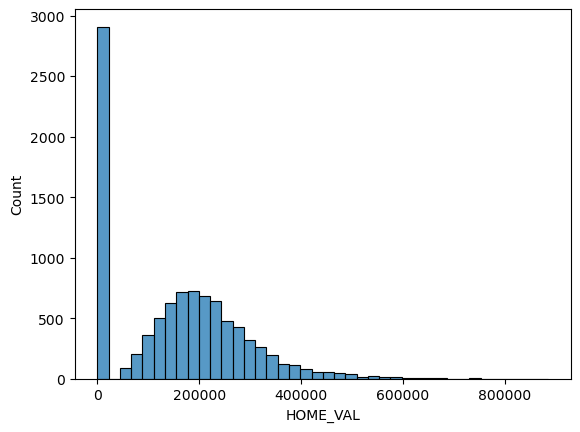

In [7]:
sns.histplot(x = "HOME_VAL", data = df)

In [8]:
df1 = df1.drop(["BIRTH", "HOME_VAL", "INCOME", "TIF"], axis=1)
df1

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,CAR_USE,BLUEBOOK,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,CLAIM_FLAG,CLM_AMT
0,63581743,0,60.0,0,11.0,No,No,M,PhD,Professional,...,Private,14230.0,Minivan,4461.0,2,No,3,18.0,0,0.0
1,132761049,0,43.0,0,11.0,No,No,M,High School,Blue Collar,...,Commercial,14940.0,Minivan,0.0,0,No,0,1.0,0,0.0
2,921317019,0,48.0,0,11.0,No,No,M,Bachelors,Manager,...,Private,21970.0,Van,0.0,0,No,2,10.0,0,0.0
3,727598473,0,35.0,1,10.0,No,Yes,F,High School,Clerical,...,Private,4010.0,SUV,38690.0,2,No,3,10.0,0,0.0
6,871024631,0,34.0,1,12.0,Yes,No,F,Bachelors,Blue Collar,...,Commercial,17430.0,Sports Car,0.0,0,No,0,7.0,1,2946.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,121441578,0,35.0,0,11.0,No,No,M,High School,Blue Collar,...,Commercial,27330.0,Panel Truck,0.0,0,No,0,8.0,0,0.0
10297,67790126,1,45.0,2,9.0,No,Yes,M,PhD,Manager,...,Private,13270.0,Minivan,0.0,0,No,2,17.0,0,0.0
10299,849208064,0,48.0,0,15.0,No,Yes,F,<High School,Blue Collar,...,Private,13820.0,SUV,0.0,0,No,0,1.0,0,0.0
10300,627828331,0,50.0,0,7.0,No,Yes,F,Bachelors,Home Maker,...,Private,22550.0,Minivan,0.0,0,No,0,11.0,0,0.0


In [9]:
df1 = df1.replace({"No": 0, "Yes": 1})

In [10]:
df1.CAR_USE = df1.CAR_USE.replace({"Commercial": 1, "Private": 0})

In [11]:
df1.GENDER = df1.GENDER.replace({"M": 1, "F": 0})

In [12]:
df1.URBANICITY = df1.URBANICITY.replace({"Highly Urban/ Urban": 1, "Highly Rural/ Rural": 0})

In [13]:
df1

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,CAR_USE,BLUEBOOK,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,CLAIM_FLAG,CLM_AMT
0,63581743,0,60.0,0,11.0,0,0,1,PhD,Professional,...,0,14230.0,Minivan,4461.0,2,0,3,18.0,0,0.0
1,132761049,0,43.0,0,11.0,0,0,1,High School,Blue Collar,...,1,14940.0,Minivan,0.0,0,0,0,1.0,0,0.0
2,921317019,0,48.0,0,11.0,0,0,1,Bachelors,Manager,...,0,21970.0,Van,0.0,0,0,2,10.0,0,0.0
3,727598473,0,35.0,1,10.0,0,1,0,High School,Clerical,...,0,4010.0,SUV,38690.0,2,0,3,10.0,0,0.0
6,871024631,0,34.0,1,12.0,1,0,0,Bachelors,Blue Collar,...,1,17430.0,Sports Car,0.0,0,0,0,7.0,1,2946.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,121441578,0,35.0,0,11.0,0,0,1,High School,Blue Collar,...,1,27330.0,Panel Truck,0.0,0,0,0,8.0,0,0.0
10297,67790126,1,45.0,2,9.0,0,1,1,PhD,Manager,...,0,13270.0,Minivan,0.0,0,0,2,17.0,0,0.0
10299,849208064,0,48.0,0,15.0,0,1,0,<High School,Blue Collar,...,0,13820.0,SUV,0.0,0,0,0,1.0,0,0.0
10300,627828331,0,50.0,0,7.0,0,1,0,Bachelors,Home Maker,...,0,22550.0,Minivan,0.0,0,0,0,11.0,0,0.0


In [45]:
data1 = df1.groupby("EDUCATION").sum()
data1

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,URBANICITY,TRAVTIME,CAR_USE,BLUEBOOK,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,CLAIM_FLAG,CLM_AMT
EDUCATION,,,,,,,,,,,,,,,,,,,
<High School,598941269596,254,50153.0,1285,12013.0,192,734,538,832,41064,255,14992110.0,4918326.0,977,140,2253,4112.0,395,2183883.0
Bachelors,1129311450973,354,99198.0,1510,23438.0,308,1309,1021,1799,75087,928,35662310.0,8948993.0,1800,260,3812,19648.0,527,3178783.0
High School,1185187774822,487,102765.0,2160,24166.0,371,1464,1042,1693,81137,1187,32917950.0,10295029.0,1976,340,4329,10631.0,833,4321307.0
Masters,634622569784,174,63174.0,537,14586.0,109,788,566,1203,42984,130,22158880.0,4868571.0,910,162,1975,18520.0,219,1132991.0
PhD,265306995774,49,26982.0,179,5837.0,45,284,213,516,17529,60,10537890.0,1814907.0,389,56,784,7525.0,85,518538.0


In [14]:
df4 = pd.get_dummies(df1[["EDUCATION","OCCUPATION","CAR_TYPE"]])

In [15]:
col = list(df4)
col[1], col[2] = col[2], col[1]
df4 = df4[col]

In [16]:
df4

,EDUCATION_<High School,EDUCATION_High School,EDUCATION_Bachelors,EDUCATION_Masters,EDUCATION_PhD,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van
0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
10297,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
10299,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
10300,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [17]:
df2 = df1[["ID","KIDSDRIV","AGE","HOMEKIDS","YOJ","PARENT1","MSTATUS","GENDER","URBANICITY","TRAVTIME","CAR_USE","BLUEBOOK","OLDCLAIM","CLM_FREQ","REVOKED","MVR_PTS","CAR_AGE"]]

In [18]:
df2

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,URBANICITY,TRAVTIME,CAR_USE,BLUEBOOK,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE
0,63581743,0,60.0,0,11.0,0,0,1,1,14,0,14230.0,4461.0,2,0,3,18.0
1,132761049,0,43.0,0,11.0,0,0,1,1,22,1,14940.0,0.0,0,0,0,1.0
2,921317019,0,48.0,0,11.0,0,0,1,1,26,0,21970.0,0.0,0,0,2,10.0
3,727598473,0,35.0,1,10.0,0,1,0,1,5,0,4010.0,38690.0,2,0,3,10.0
6,871024631,0,34.0,1,12.0,1,0,0,1,46,1,17430.0,0.0,0,0,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,121441578,0,35.0,0,11.0,0,0,1,0,51,1,27330.0,0.0,0,0,0,8.0
10297,67790126,1,45.0,2,9.0,0,1,1,1,21,0,13270.0,0.0,0,0,2,17.0
10299,849208064,0,48.0,0,15.0,0,1,0,1,12,0,13820.0,0.0,0,0,0,1.0
10300,627828331,0,50.0,0,7.0,0,1,0,1,36,0,22550.0,0.0,0,0,0,11.0


In [19]:
df3 = df1[["CLAIM_FLAG","CLM_AMT"]]

In [20]:
df3

,CLAIM_FLAG,CLM_AMT
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
6,1,2946.0
...,...,...
10296,0,0.0
10297,0,0.0
10299,0,0.0
10300,0,0.0


In [21]:
frame = [df2, df4, df3]
df5 = pd.concat(frame, axis=1)

In [22]:
df5

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,URBANICITY,TRAVTIME,...,OCCUPATION_Professional,OCCUPATION_Student,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,CLAIM_FLAG,CLM_AMT
0,63581743,0,60.0,0,11.0,0,0,1,1,14,...,1,0,1,0,0,0,0,0,0,0.0
1,132761049,0,43.0,0,11.0,0,0,1,1,22,...,0,0,1,0,0,0,0,0,0,0.0
2,921317019,0,48.0,0,11.0,0,0,1,1,26,...,0,0,0,0,0,0,0,1,0,0.0
3,727598473,0,35.0,1,10.0,0,1,0,1,5,...,0,0,0,0,0,1,0,0,0,0.0
6,871024631,0,34.0,1,12.0,1,0,0,1,46,...,0,0,0,0,0,0,1,0,1,2946.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,121441578,0,35.0,0,11.0,0,0,1,0,51,...,0,0,0,1,0,0,0,0,0,0.0
10297,67790126,1,45.0,2,9.0,0,1,1,1,21,...,0,0,1,0,0,0,0,0,0,0.0
10299,849208064,0,48.0,0,15.0,0,1,0,1,12,...,0,0,0,0,0,1,0,0,0,0.0
10300,627828331,0,50.0,0,7.0,0,1,0,1,36,...,0,0,1,0,0,0,0,0,0,0.0


In [23]:
df5.to_csv("cleaned_UBI.csv", index=0)

In [24]:
df5["AVG_AMT"] = df5["OLDCLAIM"] / df5["CLM_FREQ"]

In [25]:
df5

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,URBANICITY,TRAVTIME,...,OCCUPATION_Student,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,CLAIM_FLAG,CLM_AMT,AVG_AMT
0,63581743,0,60.0,0,11.0,0,0,1,1,14,...,0,1,0,0,0,0,0,0,0.0,2230.5
1,132761049,0,43.0,0,11.0,0,0,1,1,22,...,0,1,0,0,0,0,0,0,0.0,NaN
2,921317019,0,48.0,0,11.0,0,0,1,1,26,...,0,0,0,0,0,0,1,0,0.0,NaN
3,727598473,0,35.0,1,10.0,0,1,0,1,5,...,0,0,0,0,1,0,0,0,0.0,19345.0
6,871024631,0,34.0,1,12.0,1,0,0,1,46,...,0,0,0,0,0,1,0,1,2946.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,121441578,0,35.0,0,11.0,0,0,1,0,51,...,0,0,1,0,0,0,0,0,0.0,NaN
10297,67790126,1,45.0,2,9.0,0,1,1,1,21,...,0,1,0,0,0,0,0,0,0.0,NaN
10299,849208064,0,48.0,0,15.0,0,1,0,1,12,...,0,0,0,0,1,0,0,0,0.0,NaN
10300,627828331,0,50.0,0,7.0,0,1,0,1,36,...,0,1,0,0,0,0,0,0,0.0,NaN


In [26]:
df6 = df5.dropna()
df6

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,URBANICITY,TRAVTIME,...,OCCUPATION_Student,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,CLAIM_FLAG,CLM_AMT,AVG_AMT
0,63581743,0,60.0,0,11.0,0,0,1,1,14,...,0,1,0,0,0,0,0,0,0.0,2230.500000
3,727598473,0,35.0,1,10.0,0,1,0,1,5,...,0,0,0,0,1,0,0,0,0.0,19345.000000
8,7945239,1,40.0,1,11.0,1,0,1,1,21,...,0,1,0,0,0,0,0,1,6477.0,3295.000000
15,376482434,0,55.0,0,11.0,0,1,1,1,25,...,0,0,0,0,0,0,1,0,0.0,2514.000000
20,162166370,0,59.0,0,12.0,0,0,1,1,45,...,0,1,0,0,0,0,0,1,4111.0,22428.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10287,622965460,0,45.0,0,11.0,0,0,1,1,16,...,0,0,0,1,0,0,0,1,2967.0,8119.500000
10288,812664761,0,54.0,0,11.0,0,1,1,1,38,...,0,0,0,0,0,0,1,0,0.0,5038.000000
10290,788620578,0,54.0,0,13.0,0,1,1,1,18,...,0,0,0,0,0,0,1,0,0.0,24690.000000
10291,813128,1,46.0,0,12.0,0,0,1,0,26,...,0,1,0,0,0,0,0,0,0.0,11008.666667


In [27]:
UBI_train_p = df5[["KIDSDRIV","MSTATUS","GENDER","URBANICITY","TRAVTIME","CAR_USE","BLUEBOOK","REVOKED","MVR_PTS"]]

In [28]:
UBI_p = df5["CLM_FREQ"]

<AxesSubplot:xlabel='CLM_FREQ', ylabel='Count'>

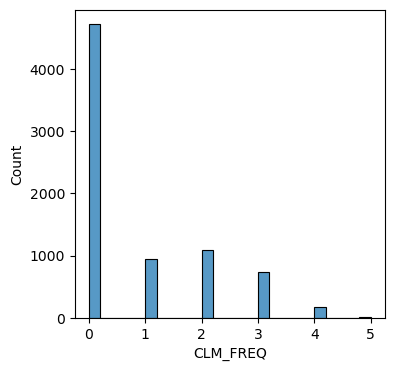

In [29]:
plt.figure(figsize=(4, 4))
sns.histplot(data=UBI_p)

In [30]:
UBI_train_g = df5[["KIDSDRIV","MSTATUS","GENDER","URBANICITY","TRAVTIME","CAR_USE","BLUEBOOK","REVOKED","MVR_PTS","AVG_AMT"]].dropna()

In [31]:
UBI_g = UBI_train_g["AVG_AMT"]

In [33]:
np.array(UBI_train_p)

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 1.423e+04, 0.000e+00,
        3.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.494e+04, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.197e+04, 0.000e+00,
        2.000e+00],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.382e+04, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.255e+04, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.940e+04, 0.000e+00,
        0.000e+00]])

In [34]:
X_p = sm.add_constant(UBI_train_p)
X_p

,const,KIDSDRIV,MSTATUS,GENDER,URBANICITY,TRAVTIME,CAR_USE,BLUEBOOK,REVOKED,MVR_PTS
0,1.0,0,0,1,1,14,0,14230.0,0,3
1,1.0,0,0,1,1,22,1,14940.0,0,0
2,1.0,0,0,1,1,26,0,21970.0,0,2
3,1.0,0,1,0,1,5,0,4010.0,0,3
6,1.0,0,0,0,1,46,1,17430.0,0,0
...,...,...,...,...,...,...,...,...,...,...
10296,1.0,0,0,1,0,51,1,27330.0,0,0
10297,1.0,1,1,1,1,21,0,13270.0,0,2
10299,1.0,0,1,0,1,12,0,13820.0,0,0
10300,1.0,0,1,0,1,36,0,22550.0,0,0


In [35]:
a = sm.GLM(UBI_p, X_p, family=sm.families.Poisson()).fit()

In [36]:
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               CLM_FREQ   No. Observations:                 7657
Model:                            GLM   Df Residuals:                     7647
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8855.9
Date:                Sat, 01 Jul 2023   Deviance:                       10209.
Time:                        23:10:39   Pearson chi2:                 1.20e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2862
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6862      0.069    -24.510      0.000      -1.821      -1.551
KIDSDRIV       0.0914      0.023      4.016      0.000       0.047       0.136
MSTATUS       -0.1465      0.026     -5.644      0.000      -0.197      -0.096
GENDER        -0.0076      0.027     -0.285      0.775      -0.060       0.045
URBANICITY     1.2555      0.054     23.057      0.000       1.149       1.362
TRAVTIME       0.0037      0.001      4.441      0.000       0.002       0.005
CAR_USE        0.1893      0.028      6.796      0.000       0.135       0.244
BLUEBOOK   -1.204e-05   1.69e-06     -7.142      0.000   -1.53e-05   -8.74e-06
REVOKED        0.0971      0.036      2.733      0.006       0.027       0.167
MVR_PTS        0.1704      0.005     36.299      0.000       0.161       0.180
==============================================================================
"""

In [37]:
X_g = sm.add_constant(UBI_train_g)
X_g

,const,KIDSDRIV,MSTATUS,GENDER,URBANICITY,TRAVTIME,CAR_USE,BLUEBOOK,REVOKED,MVR_PTS,AVG_AMT
0,1.0,0,0,1,1,14,0,14230.0,0,3,2230.500000
3,1.0,0,1,0,1,5,0,4010.0,0,3,19345.000000
8,1.0,1,0,1,1,21,0,18930.0,0,2,3295.000000
15,1.0,0,1,1,1,25,1,17600.0,1,3,2514.000000
20,1.0,0,0,1,1,45,0,15420.0,0,4,22428.500000
...,...,...,...,...,...,...,...,...,...,...,...
10287,1.0,0,0,1,1,16,1,11300.0,1,5,8119.500000
10288,1.0,0,1,1,1,38,1,16510.0,0,3,5038.000000
10290,1.0,0,1,1,1,18,1,19660.0,1,6,24690.000000
10291,1.0,1,0,1,0,26,0,15060.0,0,0,11008.666667


In [38]:
b = sm.GLM(UBI_g, X_g, family=sm.families.Gamma(link=sm.families.links.log())).fit()

In [39]:
b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                AVG_AMT   No. Observations:                 2938
Model:                            GLM   Df Residuals:                     2927
Model Family:                   Gamma   Df Model:                           10
Link Function:                    log   Scale:                         0.20767
Method:                          IRLS   Log-Likelihood:                -26531.
Date:                Sat, 01 Jul 2023   Deviance:                       893.34
Time:                        23:10:39   Pearson chi2:                     608.
No. Iterations:                    41   Pseudo R-squ. (CS):             0.9887
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6217      0.045    168.769      0.000       7.533       7.710
KIDSDRIV      -0.0032      0.015     -0.208      0.835      -0.033       0.027
MSTATUS       -0.0067      0.017     -0.395      0.693      -0.040       0.027
GENDER        -0.0431      0.018     -2.431      0.015      -0.078      -0.008
URBANICITY    -0.0391      0.035     -1.110      0.267      -0.108       0.030
TRAVTIME      -0.0007      0.001     -1.283      0.199      -0.002       0.000
CAR_USE       -0.0197      0.019     -1.066      0.287      -0.056       0.017
BLUEBOOK    7.091e-07   1.11e-06      0.638      0.524   -1.47e-06    2.89e-06
REVOKED        0.1606      0.028      5.715      0.000       0.106       0.216
MVR_PTS        0.0060      0.003      1.842      0.065      -0.000       0.012
AVG_AMT        0.0001   1.22e-06     91.085      0.000       0.000       0.000
==============================================================================
"""

In [40]:
exp_f = a.predict(X_p)

In [41]:
exp_a = b.predict(X_p)

ValueError: shapes (7657,10) and (11,) not aligned: 10 (dim 1) != 11 (dim 0)

In [ ]:
exp_c = exp_f * exp_a

In [ ]:
exp_c

0        4156.797548
1        2733.184027
2        3383.932777
3        4345.800636
6        3044.725813
            ...     
10296     870.854179
10297    3257.040766
10299    2493.631137
10300    2400.394069
10301     832.129271
Length: 7657, dtype: float64

In [ ]:
np.sum(df1.OLDCLAIM) / np.sum(exp_c)

0.8083721920322449

In [7]:
formula = "y ~ C(category1) + C(category2) + C(category3)"

# Generate input values
n_samples = 1000
categories1 = np.random.choice(['A', 'B', 'C'], size=n_samples)
categories2 = np.random.choice(['X', 'Y', 'Z'], size=n_samples)
categories3 = np.random.choice(['Red', 'Green', 'Blue'], size=n_samples)

# Compute linear predictor
linear_predictor = 1 + (categories1 == 'B') + (categories2 == 'Y') + (categories3 == 'Green')

# Apply inverse link function (exponential)
expected_values = np.exp(linear_predictor)

# Generate Poisson-distributed response variable
y = np.random.poisson(expected_values)

# Create dataset
data = pd.DataFrame({"y": y, "category1": categories1, "category2": categories2, "category3": categories3})

# Fit the GLM
model = sm.GLM.from_formula(formula, data=data, family=sm.families.Poisson())
result = model.fit()

# Print model summary
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      993
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2394.0
Date:                Sun, 02 Jul 2023   Deviance:                       1027.7
Time:                        22:56:57   Pearson chi2:                     976.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9998
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.98

In [ ]:
Coefficients:
                        Estimate    std. Error  z value Pr (>|z|)
(Intercept)             1.042463    0.107106    9.733   2e-16
distanceband10001-15000 0.188736    0.107806    1.751   0.079998
distanceband15001-20000 0.406591    0.106772    3.808   0.000140
distanceband 5001-10000 0.077856    0.126978    0.613   0.539781
distancebandAbove 20000 0.461939    0.112759    4.097   4.19e-05
speedband40-59          -0.511360   0.105624    -4.841  1.29e-06
speedband60-79          -0.789678   0.083661    -9.439  2e-16
speedband80-99          -0.294603   0.077232    -3.815  0.000136
speedbandBelow 40       -0.610905   0.123629    -4.941  7.76e-07
TimeNight               0.009637    0.057143    0.169   0.866073

In [6]:
# Define the ranges or categories for each input variable
distanceband_categories = ['0-5000', '5001-10000', '10001-15000', '15001-20000', 'Above 20000']
speedband_categories = ['Below 40', '40-59', '60-79', '80-99', 'Above 100']
timenight_categories = ['Day', 'Night']

# Set the number of samples
n_samples = 10000

# Randomly generate input values
distanceband = np.random.choice(distanceband_categories, size=n_samples, p=[0.12, 0.14, 0.28, 0.28, 0.18])
speedband = np.random.choice(speedband_categories, size=n_samples, p=[0.08, 0.1, 0.36, 0.36, 0.1])
timenight = np.random.choice(timenight_categories, size=n_samples, p=[0.4, 0.6])

# Define the coefficients
coefficients = [1.042463,
                0.188736,
                0.406591,
                0.077856,
                0.461939,
                -0.511360,
                -0.789678,
                -0.294603,
                -0.610905,
                0.009637]

# Compute the linear predictor
linear_predictor = (
    coefficients[0] +
    coefficients[1] * (distanceband == '10001-15000') +
    coefficients[2] * (distanceband == '15001-20000') +
    coefficients[3] * (distanceband == '5001-10000') +
    coefficients[4] * (distanceband == 'Above 20000') +
    coefficients[5] * (speedband == '40-59') +
    coefficients[6] * (speedband == '60-79') +
    coefficients[7] * (speedband == '80-99') +
    coefficients[8] * (speedband == 'Below 40') +
    coefficients[9] * (timenight == 'Night')
)

# Apply the inverse link function (you should replace this with the appropriate link function)
expected_values = np.exp(linear_predictor)

# Generate Poisson-distributed response variable
y = np.random.poisson(expected_values)

# Create the dataset
data = pd.DataFrame({
    'y': y,
    'distanceband': distanceband,
    'speedband': speedband,
    'timenight': timenight
})

# Print the sample dataset
print(data.head())


   y distanceband  speedband timenight
0  7  15001-20000  Above 100     Night
1  4  15001-20000      40-59     Night
2  2  15001-20000      80-99       Day
3  3  15001-20000      60-79     Night
4  4  10001-15000      40-59       Day


<AxesSubplot:xlabel='distanceband', ylabel='y'>

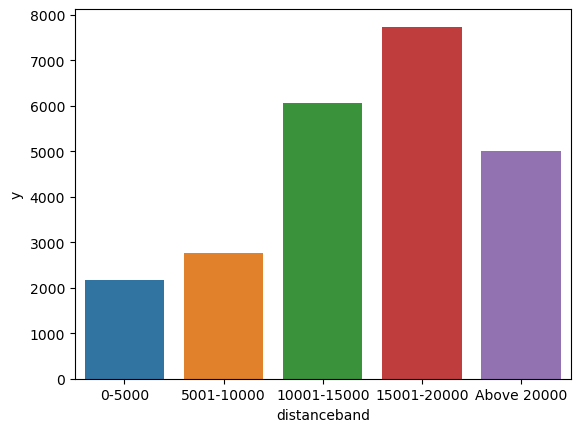

In [7]:
df11 = data.groupby("distanceband").sum().reset_index()
order = ["0-5000", "5001-10000", "10001-15000", "15001-20000", "Above 20000"]
df11["distanceband"] = pd.Categorical(df11["distanceband"], categories=order)
df11.sort_values(by="distanceband", inplace=True)
sns.barplot(data=df11, x="distanceband", y='y')

<AxesSubplot:xlabel='speedband', ylabel='y'>

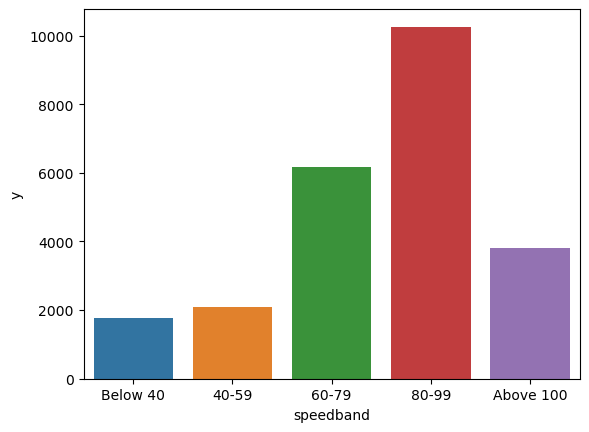

In [5]:
df12 = data.groupby("speedband").sum().reset_index()
order = ["Below 40", "40-59", "60-79", "80-99", "Above 100"]
df12["speedband"] = pd.Categorical(df12["speedband"], categories=order)
df12.sort_values(by="speedband", inplace=True)
sns.barplot(data=df12, x="speedband", y='y')

In [8]:
aa = data[['distanceband','speedband','timenight']]
aa = sm.add_constant(aa)
aa = pd.get_dummies(aa).drop(["distanceband_0-5000", "speedband_Above 100", "timenight_Day"], axis=1)
ab = data.y
sm.GLM(ab, aa, family=sm.families.Poisson()).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9990
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17690.
Date:                Mon, 03 Jul 2023   Deviance:                       11157.
Time:                        14:53:26   Pearson chi2:                 9.87e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2089
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.0207      0.027     37.387      0.000       0.967       1.074
distanceband_10001-15000     0.1936      0.025      7.745      0.000       0.145       0.243
distanceband_15001-20000     0.4397      0.024     18.115      0.000       0.392       0.487
distanceband_5001-10000      0.0795      0.029      2.775      0.006       0.023       0.136
distanceband_Above 20000     0.4789      0.026     18.644      0.000       0.429       0.529
speedband_40-59             -0.5338      0.027    -19.739      0.000      -0.587      -0.481
speedband_60-79             -0.7562      0.021    -36.553      0.000      -0.797      -0.716
speedband_80-99             -0.2906      0.019    -15.144      0.000      -0.328      -0.253
speedband_Below 40          -0.6240      0.030    -21.021      0.000      -0.682      -0.566
timenight_Night              0.0052      0.013      0.390      0.697      -0.021       0.031
============================================================================================
"""

In [9]:
aa.sum()

const                       10000.0
distanceband_10001-15000     2804.0
distanceband_15001-20000     2803.0
distanceband_5001-10000      1437.0
distanceband_Above 20000     1733.0
speedband_40-59               998.0
speedband_60-79              3589.0
speedband_80-99              3585.0
speedband_Below 40            820.0
timenight_Night              5977.0
dtype: float64

In [32]:
# Define the ranges or categories for each input variable
distanceband_categories = ['0-5000', '5001-10000', '10001-15000', '15001-20000', 'Above 20000']
speedband_categories = ['Below 40', '40-59', '60-79', '80-99', 'Above 100']
timenight_categories = ['Day', 'Night']

# Set the number of samples
n_samples = 10000

# Randomly generate input values
distanceband = np.random.choice(distanceband_categories, size=n_samples, p=[0.12, 0.14, 0.28, 0.28, 0.18])
speedband = np.random.choice(speedband_categories, size=n_samples, p=[0.08, 0.1, 0.36, 0.36, 0.1])
timenight = np.random.choice(timenight_categories, size=n_samples, p=[0.4, 0.6])

# Define the coefficients
coefficients = [11.83214,
                0.26704,
                0.56546,
                0.73356,
                1.79927,
                -0.94865,
                -1.44837,
                -1.03472,
                -1.43830,
                -0.06352]

# Apply the inverse link function (you should replace this with the appropriate link function)
expected_values = np.exp(linear_predictor)

# Generate Poisson-distributed response variable
b = 1
y = np.random.gamma(b * expected_values, b)

# Create the dataset
data = pd.DataFrame({
    'y': y,
    'distanceband': distanceband,
    'speedband': speedband,
    'timenight': timenight
})

# Print the sample dataset
print(data.head())


TypeError: gamma() got an unexpected keyword argument 'rate'

<AxesSubplot:xlabel='distanceband', ylabel='y'>

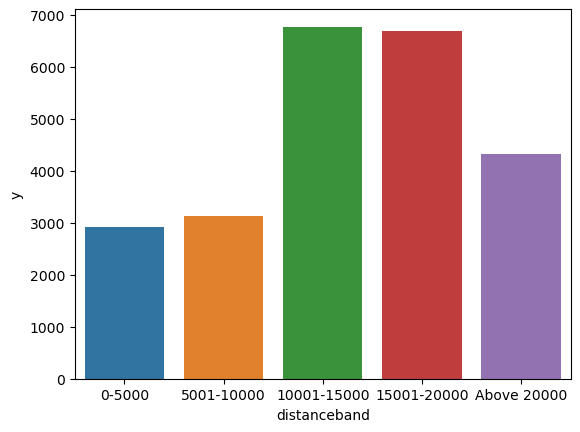

In [ ]:
df11 = data.groupby("distanceband").sum().reset_index()
order = ["0-5000", "5001-10000", "10001-15000", "15001-20000", "Above 20000"]
df11["distanceband"] = pd.Categorical(df11["distanceband"], categories=order)
df11.sort_values(by="distanceband", inplace=True)
sns.barplot(data=df11, x="distanceband", y='y')

<AxesSubplot:xlabel='speedband', ylabel='y'>

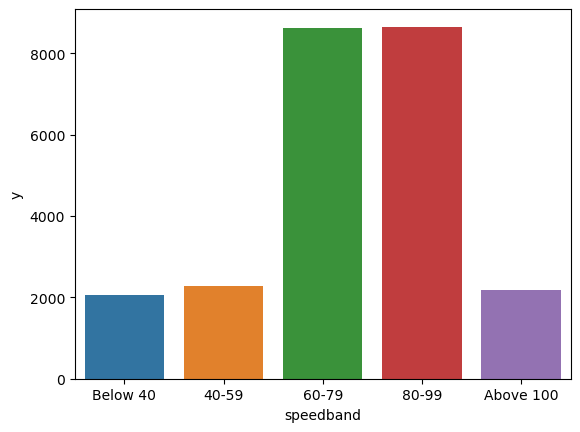

In [ ]:
df12 = data.groupby("speedband").sum().reset_index()
order = ["Below 40", "40-59", "60-79", "80-99", "Above 100"]
df12["speedband"] = pd.Categorical(df12["speedband"], categories=order)
df12.sort_values(by="speedband", inplace=True)
sns.barplot(data=df12, x="speedband", y='y')

In [152]:
n_samples = 9135

In [153]:
dist = np.round(np.random.normal(12000, 4000, n_samples))
dist[dist < 1000] = 5000 - dist[dist < 1000]

<AxesSubplot:ylabel='Count'>

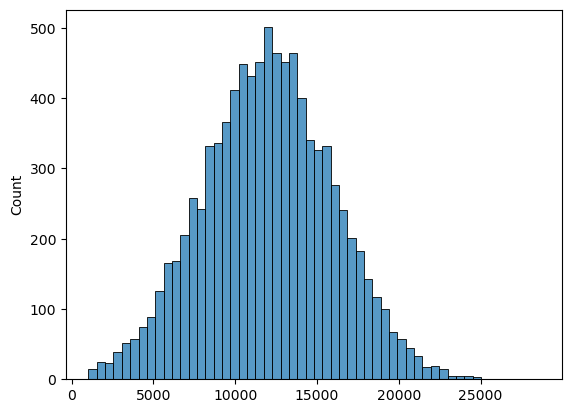

In [154]:
sns.histplot(dist)

In [155]:
speed = np.round(np.random.normal(80, 20, n_samples))
speed[speed < 20] = 40 - speed[speed < 20]

<AxesSubplot:ylabel='Count'>

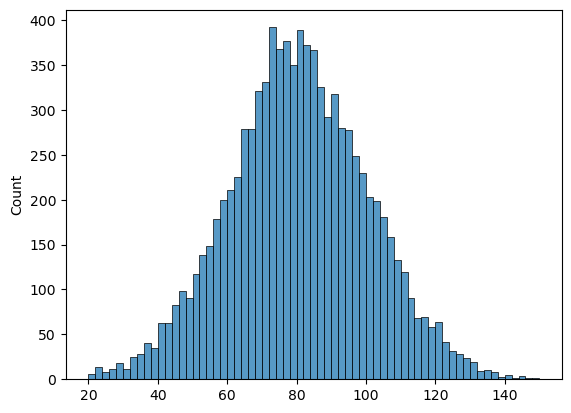

In [156]:
sns.histplot(speed, binwidth=2)

In [157]:
time = np.random.choice(['Day', 'Night'], n_samples)

In [159]:
seve = np.array([[64, 245, 429, 1186, 1340],
                 [621, 668, 1742, 1934, 3106],
                 [726, 1481, 2425, 2586, 3543],
                 [873, 1566, 2796, 4160, 5355],
                 [718, 2622, 6406, 7607, 8306]]) * 19
freq = np.array([[14, 7, 15, 36, 46],
                 [25, 7, 46, 25, 36],
                 [23, 38, 113, 140, 44],
                 [18, 66, 105, 145, 82],
                 [10, 22, 41, 113, 66]]) * 19

In [160]:
seve

array([[  1216,   4655,   8151,  22534,  25460],
       [ 11799,  12692,  33098,  36746,  59014],
       [ 13794,  28139,  46075,  49134,  67317],
       [ 16587,  29754,  53124,  79040, 101745],
       [ 13642,  49818, 121714, 144533, 157814]])

In [161]:
freq

array([[ 266,  133,  285,  684,  874],
       [ 475,  133,  874,  475,  684],
       [ 437,  722, 2147, 2660,  836],
       [ 342, 1254, 1995, 2755, 1558],
       [ 190,  418,  779, 2147, 1254]])

In [162]:
d_prob = np.array([0.04, 0.2685, 0.4648, 0.2039, 0.0228])
s_prob = np.array([0.0228, 0.1359, 0.3413, 0.3413, 0.1587])
b_count = np.round(np.outer(d_prob, d_prob)*n_samples)

In [163]:
np.sum(d_prob)

1.0

In [164]:
np.sum(s_prob)

1.0

In [165]:
b_count

array([[  15.,   98.,  170.,   75.,    8.],
       [  98.,  659., 1140.,  500.,   56.],
       [ 170., 1140., 1974.,  866.,   97.],
       [  75.,  500.,  866.,  380.,   42.],
       [   8.,   56.,   97.,   42.,    5.]])

In [166]:
seve_p = np.round(seve / b_count)

In [176]:
freq_p = np.round(freq / b_count)

In [168]:
seve_p

array([[8.1000e+01, 4.8000e+01, 4.8000e+01, 3.0000e+02, 3.1820e+03],
       [1.2000e+02, 1.9000e+01, 2.9000e+01, 7.3000e+01, 1.0540e+03],
       [8.1000e+01, 2.5000e+01, 2.3000e+01, 5.7000e+01, 6.9400e+02],
       [2.2100e+02, 6.0000e+01, 6.1000e+01, 2.0800e+02, 2.4220e+03],
       [1.7050e+03, 8.9000e+02, 1.2550e+03, 3.4410e+03, 3.1563e+04]])

In [179]:
freq_p

array([[ 1.,  1.,  2.,  4.,  7.],
       [ 2.,  1.,  1.,  3.,  9.],
       [ 3.,  1.,  1.,  3.,  9.],
       [ 5.,  3.,  2.,  7., 11.],
       [ 5.,  7.,  8., 10., 15.]])

In [178]:
freq_p[0][0] = 1
freq_p[1][0] = 2
freq_p[4][0] = 5
freq_p[1][1] = 1
freq_p[0][3] = 4
freq_p[1][3] = 3
freq_p[4][3] = 10
freq_p[0][4] = 7
freq_p[1][4] = 9
freq_p[3][4] = 11
freq_p[4][4] = 15

In [182]:
data1 = pd.DataFrame({
    "Distance" : dist,
    "Speed" : speed,
    "Time" : time,
    "Severity" : np.zeros(n_samples),
    "Frequency" : np.zeros(n_samples)})

In [183]:
data1

,Distance,Speed,Time,Severity,Frequency
0,8186.0,64.0,Day,0.0,0.0
1,15679.0,92.0,Night,0.0,0.0
2,9687.0,110.0,Day,0.0,0.0
3,11316.0,81.0,Night,0.0,0.0
4,8114.0,99.0,Night,0.0,0.0
...,...,...,...,...,...
9130,20319.0,119.0,Day,0.0,0.0
9131,13652.0,119.0,Night,0.0,0.0
9132,12548.0,53.0,Day,0.0,0.0
9133,10636.0,85.0,Day,0.0,0.0


In [214]:
for i in range(n_samples):
    dist_i = int(data1.loc[i, "Distance"] // 5000)
    speed_i = int(data1.loc[i, "Speed"] // 20 - 2)
    if speed_i < 0: speed_i = 0
    if speed_i > 4: speed_i = 4
    if dist_i > 4: dist_i = 4
    s = np.round(np.random.gamma(seve_p[dist_i][speed_i], 1), 2)
    f = np.random.poisson(freq_p[dist_i][speed_i])
    data1.loc[i, "Severity"] = s
    data1.loc[i, "Frequency"] = f


In [220]:
data1

,Distance,Speed,Time,Severity,Frequency,DistBand,SpeedBand
0,8186.0,64.0,Day,21.80,1.0,5001-10000,60-79
1,15679.0,92.0,Night,57.44,0.0,15001-20000,80-99
2,9687.0,110.0,Day,81.28,2.0,5001-10000,>=100
3,11316.0,81.0,Night,22.54,2.0,10001-15000,80-99
4,8114.0,99.0,Night,26.42,1.0,5001-10000,80-99
...,...,...,...,...,...,...,...
9130,20319.0,119.0,Day,3392.09,9.0,>20000,>=100
9131,13652.0,119.0,Night,54.44,2.0,10001-15000,>=100
9132,12548.0,53.0,Day,81.05,1.0,10001-15000,40-59
9133,10636.0,85.0,Day,16.52,1.0,10001-15000,80-99


In [217]:
data1["DistBand"] = pd.cut(data1["Distance"],
                           [0, 5000, 10000, 15000, 20000, 1e6],
                           labels=["0-5000", "5001-10000", "10001-15000", "15001-20000", ">20000"])

In [219]:
data1["SpeedBand"] = pd.cut(data1["Speed"],
                           [0, 39, 59, 79, 99, 1e6],
                           labels=["<40", "40-59", "60-79", "80-99", ">=100"])

In [224]:
df11 = data1.groupby("DistBand").sum().reset_index()
order = ["0-5000", "5001-10000", "10001-15000", "15001-20000", ">20000"]
df11["DistBand"] = pd.Categorical(df11["DistBand"], categories=order)
df11.sort_values(by="DistBand", inplace=True)
df11

,DistBand,Distance,Speed,Severity,Frequency
0,0-5000,1268860.0,27804.0,50422.86,677.0
1,5001-10000,19690448.0,197017.0,185972.85,4127.0
2,10001-15000,53030902.0,341864.0,235574.13,7684.0
3,15001-20000,31355291.0,148583.0,316515.29,7055.0
4,>20000,4151182.0,15784.0,489192.34,1557.0


In [225]:
df12 = data1.groupby("SpeedBand").sum().reset_index()
order = ["<40", "40-59", "60-79", "80-99", ">=100"]
df12["SpeedBand"] = pd.Categorical(df12["SpeedBand"], categories=order)
df12.sort_values(by="SpeedBand", inplace=True)
df12

,SpeedBand,Distance,Speed,Severity,Frequency
0,<40,2402426.0,6393.0,33097.54,621.0
1,40-59,14189566.0,60836.0,188414.22,3661.0
2,60-79,37391867.0,220842.0,144647.74,4699.0
3,80-99,37129023.0,274576.0,190004.28,4431.0
4,>=100,18383801.0,168405.0,721513.69,7688.0


In [ ]:
sns.barplot(data=df11, x="DistBand", y='y')